# Expected Stock Returns Don't Exist

# Common Financial Models Using Expected Returns
 
## Portfolio Optimization (Markowitz Model)
 $\max_w \quad w^T\mu - \frac{\lambda}{2}w^T\Sigma w$
 subject to: $w^T\mathbf{1} = 1$
 
 where:
 - $\mu$ is the vector of expected returns
 - $\Sigma$ is the covariance matrix
 - $w$ is the vector of portfolio weights
 - $\lambda$ is the risk aversion parameter
 
## Capital Asset Pricing Model (CAPM)
 $E[R_i] = R_f + \beta_i(E[R_m] - R_f)$
 
 where:
 - $E[R_i]$ is the expected return of asset i
 - $R_f$ is the risk-free rate
 - $\beta_i$ is the beta of asset i
 - $E[R_m]$ is the expected return of the market
 
## Value at Risk (VaR)
 $VaR_{\alpha} = \mu + \sigma \Phi^{-1}(\alpha)$
 
 where:
 - $\mu$ is the expected return
 - $\sigma$ is the standard deviation
 - $\Phi^{-1}(\alpha)$ is the inverse standard normal CDF at confidence level $\alpha$
 
 ## Black-Scholes Option Pricing
 $C = S_0N(d_1) - Ke^{-rT}N(d_2)$
 
 where:
 $d_1 = \frac{\ln(S_0/K) + (r + \sigma^2/2)T}{\sigma\sqrt{T}}$
 
 - The expected return is embedded in the risk-neutral drift rate $r$


# The Definition of Expectation

The expectation, or expected value, is a fundamental concept in probability theory and statistics. It represents the long-run average value of a random variable over many repeated trials.

Formally, for a discrete random variable X with possible values x₁, x₂, ..., xₙ and corresponding probabilities p₁, p₂, ..., pₙ, the expectation is defined as:

$E[X] = \sum_{i} x_i p_i$

For a continuous random variable with probability density function f(x), the expectation is:

$E[X] = \int_{-\infty}^{\infty} x f(x) dx$

This concept is crucial in finance, where we often need to estimate the expected return of an investment. However, as we'll explore, the true expectation of returns may be fundamentally unknowable.

# Higher Order Moments
 
 The moment generating function M(t) = E[e^(tX)] is a powerful tool that generates all moments of a distribution through differentiation:
 
 $M^{(n)}(0) = E[X^n]$
 
 Critically, the existence and stability of higher order moments depends on the existence and stability of lower order moments, particularly the first moment (mean/expectation). If the first moment does not exist or is unstable, higher moments are similarly compromised.
 
 This hierarchical dependence means that if we cannot reliably estimate expected returns (first moment), we also cannot reliably estimate:
 - Variance (second moment)
 - Skewness (third moment) 
 - Kurtosis (fourth moment)
 
This has profound implications for financial modeling, where many techniques assume the existence and stability of these moments.



In [96]:
import numpy as np
# Compute analytical expected value of a fair 6-sided die
possible_values = np.array([1, 2, 3, 4, 5, 6])  # All possible outcomes
probabilities = np.array([1/6] * 6)  # Equal probability for each outcome
expected_value = np.sum(possible_values * probabilities)

print(f"Analytical expected value of a fair die: {expected_value}")

Analytical expected value of a fair die: 3.5


# Simulating Expectations

The Law of Large Numbers (LLN) provides a practical way to approximate expectations through simulation. There are two main versions of the LLN:

## Weak Law of Large Numbers
The weak law states that the sample mean converges in probability to the expected value:

For any ε > 0:
$\lim_{n \to \infty} P(|\bar{X}_n - \mu| > \epsilon) = 0$

Where $\bar{X}_n$ is the sample mean of n observations and μ is the true expectation.

## Strong Law of Large Numbers 
The strong law makes a stronger statement about almost sure convergence:

$P(\lim_{n \to \infty} \bar{X}_n = \mu) = 1$

This means the sample mean will converge to the true expectation with probability 1.

## Monte Carlo Simulation
We can leverage these theoretical results in practice through Monte Carlo simulation:

1. Draw random samples from the distribution of interest
2. Calculate the sample mean
3. As the number of samples increases, the sample mean converges to the true expectation

The rate of convergence is proportional to $\frac{1}{\sqrt{n}}$ where n is the number of samples, according to the Central Limit Theorem.

This simulation approach is particularly valuable when:
- The distribution is complex or unknown
- Analytical solutions are intractable
- We want to understand the uncertainty in our estimates

However, it's important to note that while simulation can approximate expectations, it cannot overcome fundamental uncertainty in the underlying distribution - a key issue when dealing with financial returns.


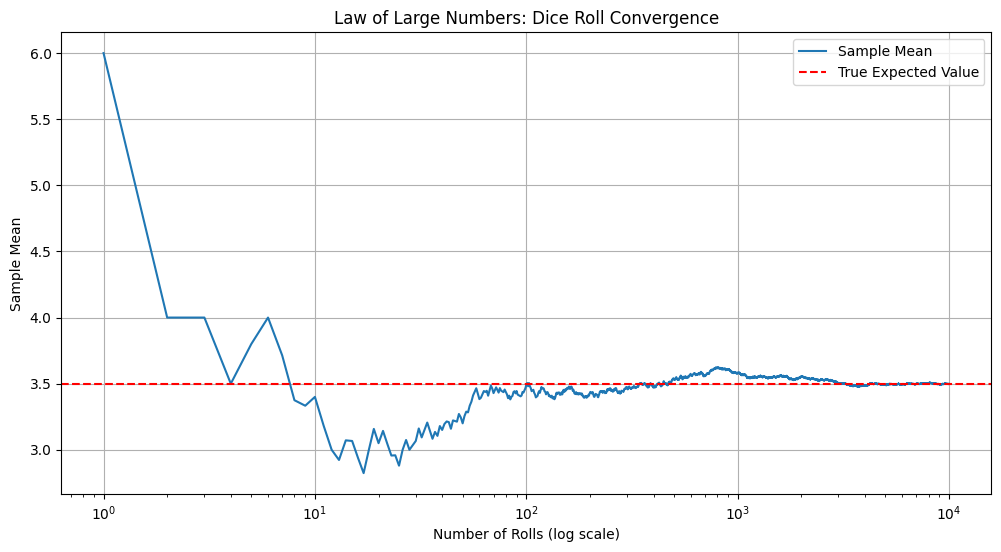

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate many dice rolls
n_rolls = 10000
rolls = np.random.randint(1, 7, size=n_rolls)

# Calculate cumulative means
cumulative_means = np.cumsum(rolls) / np.arange(1, n_rolls + 1)

# Plot the convergence
plt.figure(figsize=(12, 6))
plt.plot(range(1, n_rolls + 1), cumulative_means, label='Sample Mean')
plt.axhline(y=3.5, color='r', linestyle='--', label='True Expected Value')
plt.xscale('log')
plt.xlabel('Number of Rolls (log scale)')
plt.ylabel('Sample Mean')
plt.title('Law of Large Numbers: Dice Roll Convergence')
plt.legend()
plt.grid(True)
plt.show()

# Ergodicity

To illustrate the fundamental difference between ergodic and non-ergodic processes, let's examine two contrasting games:

## Game 1: The Ergodic Dice Game
In this fair game, players:
- Roll a standard six-sided die
- Win $1 for rolling a 6
- Lose $0.20 for any other number

The expected value per roll is:
$(1/6 × $1) + (5/6 × -$0.20) = $0$

Crucially, both the ensemble average (across multiple players) and time average (for a single player) converge to $0 over many plays.

## Game 2: The Non-Ergodic Coin Flip Game
This game, reminiscent of Russian Roulette, works as follows:
- Begin with $100
- Flip a fair coin
- On heads: multiply wealth by 1.5
- On tails: multiply wealth by 0.6

The expected multiplier appears favorable:
$(0.5 × 1.5) + (0.5 × 0.6) = 1.05$

However, this masks a crucial reality:
- The ensemble average across players grows exponentially
- The time average for individual players decays toward zero
- Most players eventually lose everything, while a select few amass extraordinary wealth

This stark contrast illuminates why expected values can be dangerously misleading when analyzing non-ergodic processes, particularly in contexts like multiplicative games and compound returns.


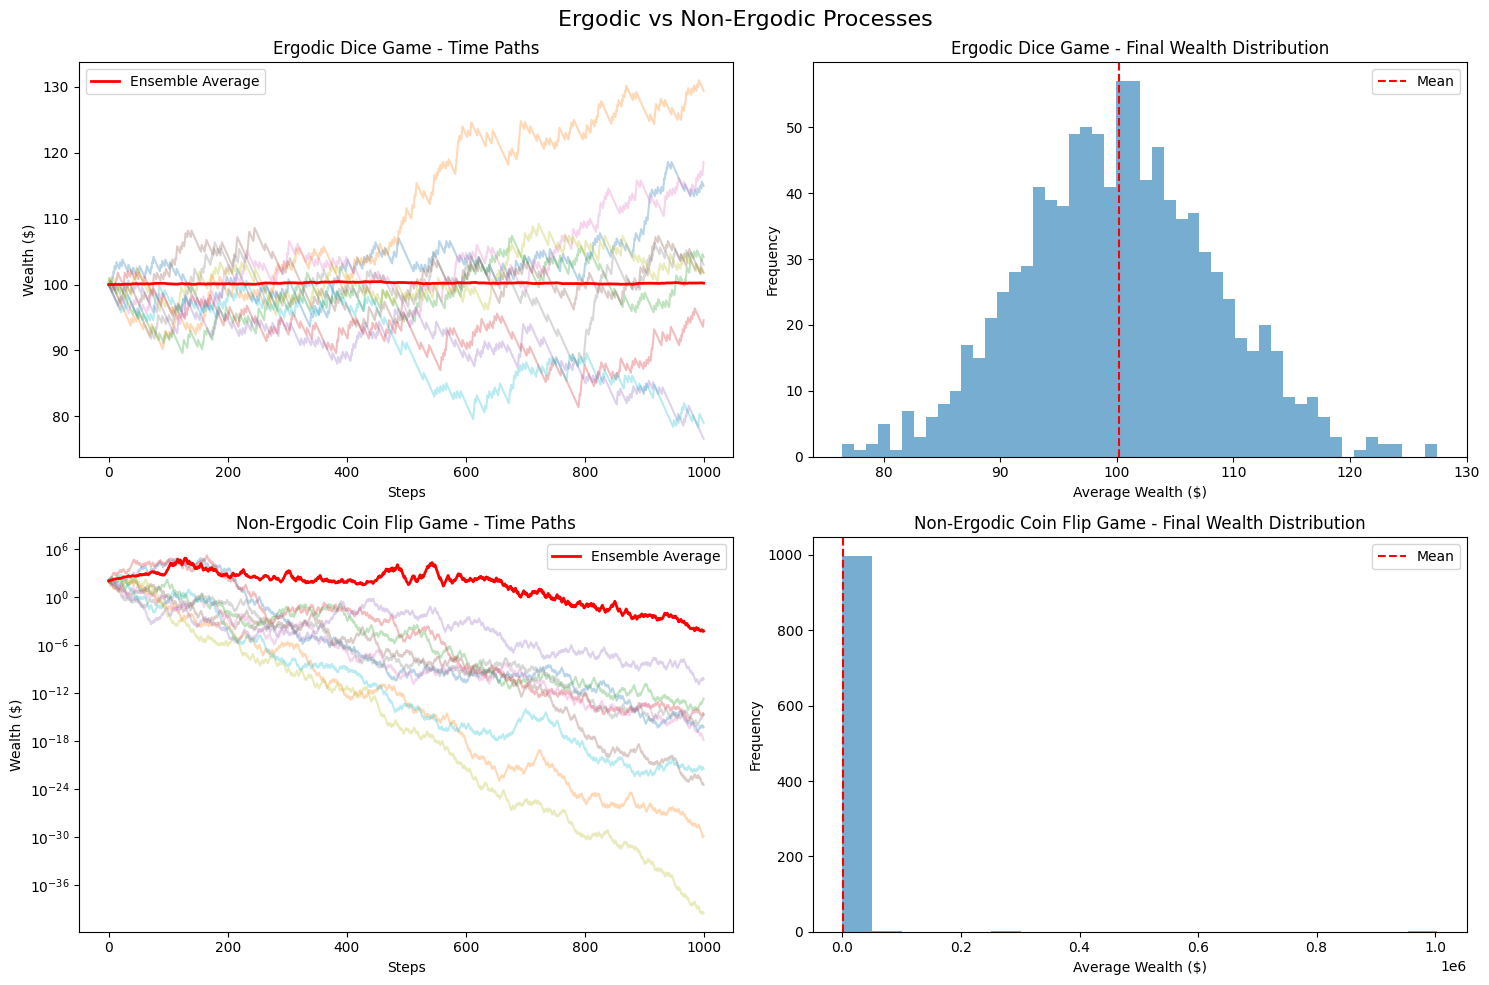

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
n_steps = 1000
n_paths = 1000

# Ergodic dice game simulation
def play_dice():
    roll = np.random.randint(1, 7)
    return 1 if roll == 6 else -0.2

# Non-ergodic coin flip simulation 
def play_coin():
    return 1.5 if np.random.random() < 0.5 else 0.6

# Run simulations
dice_paths = np.zeros((n_paths, n_steps))
coin_paths = np.zeros((n_paths, n_steps))

# Initial conditions
dice_paths[:,0] = 100  # Start with $100
coin_paths[:,0] = 100  # Start with $100

# Generate paths
for i in range(1, n_steps):
    dice_paths[:,i] = dice_paths[:,i-1] + np.array([play_dice() for _ in range(n_paths)])
    coin_paths[:,i] = coin_paths[:,i-1] * np.array([play_coin() for _ in range(n_paths)])

# Calculate averages
dice_ensemble_avg = np.mean(dice_paths, axis=0)
dice_time_avg = np.mean(dice_paths, axis=1)
coin_ensemble_avg = np.mean(coin_paths, axis=0)
coin_time_avg = np.mean(coin_paths, axis=1)

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Ergodic vs Non-Ergodic Processes', fontsize=16)

# Plot ergodic dice game
ax1.plot(dice_paths[0:10,:].T, alpha=0.3)
ax1.plot(dice_ensemble_avg, 'r-', linewidth=2, label='Ensemble Average')
ax1.set_title('Ergodic Dice Game - Time Paths')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Wealth ($)')
ax1.legend()

# Plot dice game distribution
ax2.hist(dice_time_avg, bins=50, alpha=0.6)
ax2.axvline(np.mean(dice_time_avg), color='r', linestyle='dashed', label='Mean')
ax2.set_title('Ergodic Dice Game - Final Wealth Distribution')
ax2.set_xlabel('Average Wealth ($)')
ax2.set_ylabel('Frequency')
ax2.legend()

# Plot non-ergodic coin flip game
ax3.plot(coin_paths[0:10,:].T, alpha=0.3)
ax3.plot(coin_ensemble_avg, 'r-', linewidth=2, label='Ensemble Average')
ax3.set_title('Non-Ergodic Coin Flip Game - Time Paths')
ax3.set_xlabel('Steps')
ax3.set_ylabel('Wealth ($)')
ax3.set_yscale('log')
ax3.legend()

# Plot coin flip distribution
ax4.hist(coin_time_avg, bins=20, alpha=0.6)
ax4.axvline(np.mean(coin_time_avg), color='r', linestyle='dashed', label='Mean')
ax4.set_title('Non-Ergodic Coin Flip Game - Final Wealth Distribution')
ax4.set_xlabel('Average Wealth ($)')
ax4.set_ylabel('Frequency')
ax4.legend()

plt.tight_layout()
plt.show()

# When Simulations Break Down

The St. Petersburg Paradox offers another striking example of how expected values and simulations can be misleading in non-ergodic scenarios.

## The Game
- Flip a fair coin repeatedly until it lands tails
- Payout is $2^n where n is the number of heads before tails
- Example: HHT = $2^2 = $4, HHHT = $2^3 = $8

## The Analytical Expected Value
The expected value can be calculated as:
- P(T) × $2^0 + P(HT) × $2^1 + P(HHT) × $2^2 + ...
- (1/2) × $1 + (1/4) × $2 + (1/8) × $4 + ...
- $1/2 + $1/2 + $1/2 + ... = ∞

This infinite expected value suggests we should pay any finite amount to play this game!

## The Simulation Paradox
Despite the infinite expected value, simulating this game reveals:
1. Most players win tiny amounts ($1-$4)
2. Extremely rare massive payouts dominate the average
3. No finite simulation can capture the true expected value
4. Higher statistical moments (variance, skewness, kurtosis) are undefined

## Key Insights
This paradox demonstrates that:
- Simulations can break down for heavy-tailed distributions
- Expected values can be meaningless even when calculable
- Individual experience (time average) drastically differs from ensemble averages
- Risk metrics based on moments can fail catastrophically

The St. Petersburg Paradox reminds us that mathematical expectation alone is insufficient for decision-making in non-ergodic scenarios, even when we can simulate outcomes.


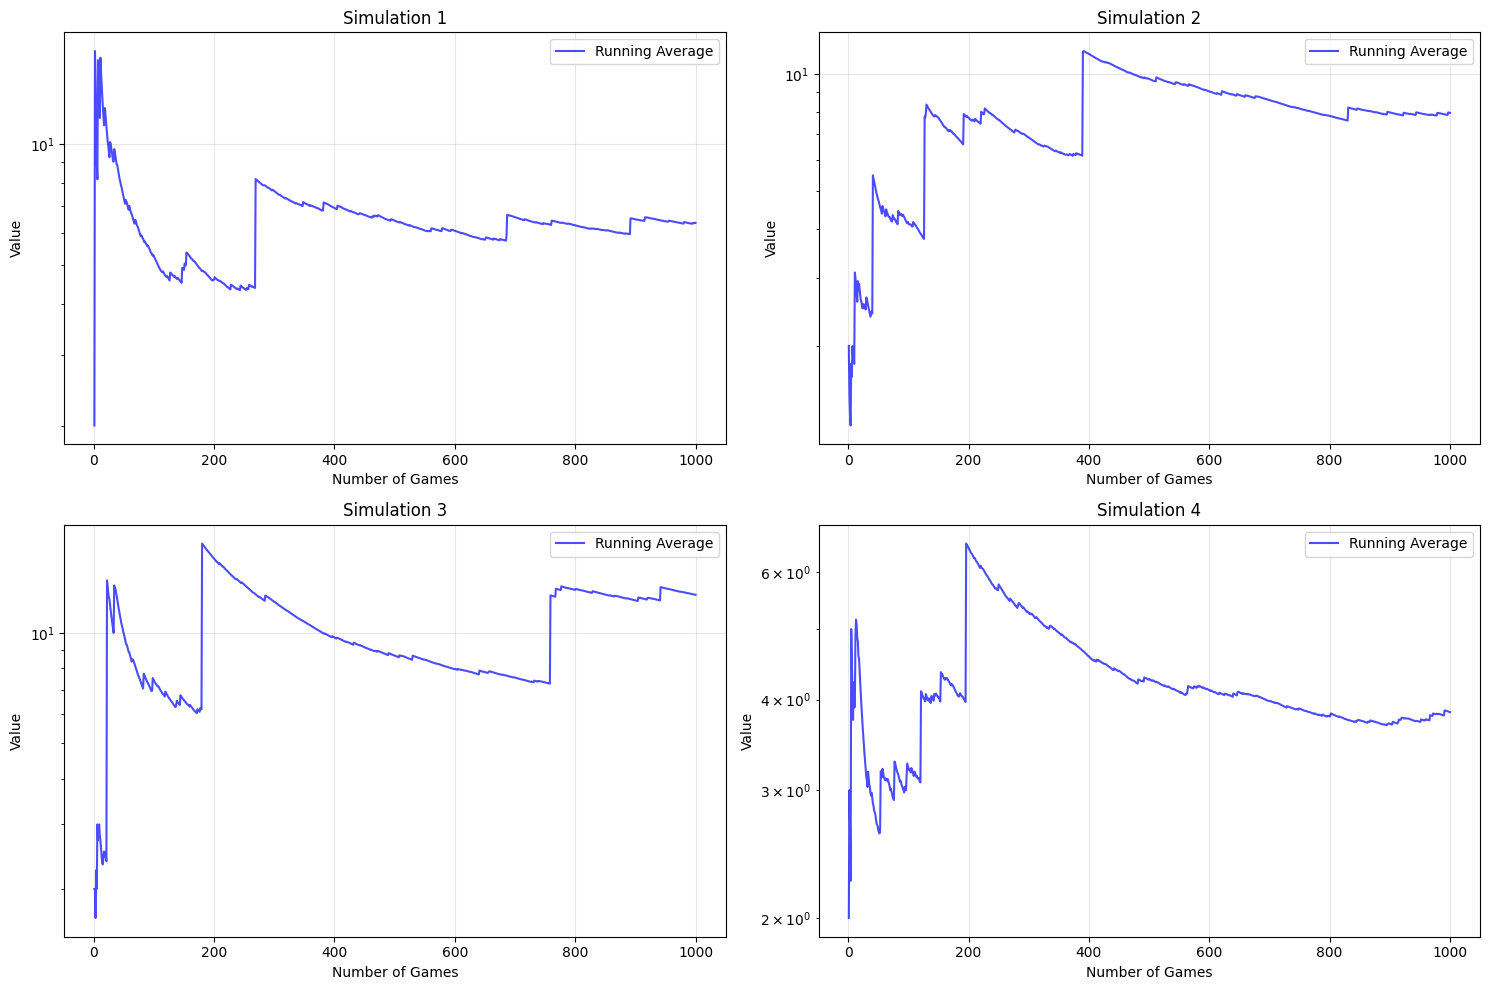

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def play_stpetersburg():
    flips = 0
    while np.random.random() < 0.5:  # Heads
        flips += 1
    return 2**flips

def simulate_games(n_games):
    payouts = [play_stpetersburg() for _ in range(n_games)]
    cumsum = np.cumsum(payouts)
    averages = cumsum / np.arange(1, n_games + 1)
    return payouts, averages

# Create figure with 4 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4]

# Run 4 separate simulations
for i, ax in enumerate(axes):
    payouts, averages = simulate_games(1000)
    
    # Plot running average
    x = np.arange(1, 1001)
    ax.plot(x, averages, label='Running Average', color='blue', alpha=0.7)
    
    ax.set_title(f'Simulation {i+1}')
    ax.set_xlabel('Number of Games')
    ax.set_ylabel('Value')
    ax.set_yscale('log')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Do Stocks have Expected Return?

Similar to the St. Petersburg Paradox, the concept of "expected returns" in the stock market presents another fascinating example of non-ergodicity and the limitations of statistical averages.

## The Ubiquity of Expected Returns
 Despite these issues, expected returns are deeply embedded in modern finance:
 - Portfolio optimization relies on expected return estimates
 - Value at Risk (VaR) calculations assume known return distributions
 - CAPM and factor models use historical averages
 - Options pricing models require expected return inputs
 - Risk management systems depend on return forecasts
 
 This creates a challenging paradox - we know expected returns are problematic, yet our entire financial system is built around them. The solution isn't as simple as "just use the average" - we need more sophisticated approaches that account for non-ergodicity and path dependence.
 


## The Theoretical Framework
- We can calculate historical average returns
- We can compute ensemble averages across different stocks
- We can estimate forward-looking expected returns using various models

## The Convergence Problem
- Unlike coin flips, stock returns don't converge to a stable mean
- Path dependency means time averages differ from ensemble averages
- Each market participant experiences a unique trajectory
- No individual investor realizes the "average" return

## Why Averages Break Down
1. Returns are non-stationary (parameters change over time)
2. Markets exhibit fat-tailed distributions
3. Extreme events dominate long-term outcomes
4. Past performance doesn't predict future results

## Key Insights
This demonstrates that:
- Historical averages may not represent future possibilities
- Individual investor outcomes can vastly differ from market averages
- Risk cannot be fully captured by standard statistical measures
- The "expected return" may exist mathematically but not be realizable

Just as the St. Petersburg Paradox shows the limitations of expected value in gambling, stock market returns highlight how mathematical expectations can diverge from realized outcomes in complex, non-ergodic systems.

# NVDA Returns

In [74]:
import pandas as pd

# Read in NVDA returns data
nvda_df = pd.read_csv('NVDA_returns.csv')

C:\Users\Roman\AppData\Local\Temp\ipykernel_27692\288730813.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  nvda_df['Returns'] = nvda_df['Close'].pct_change()


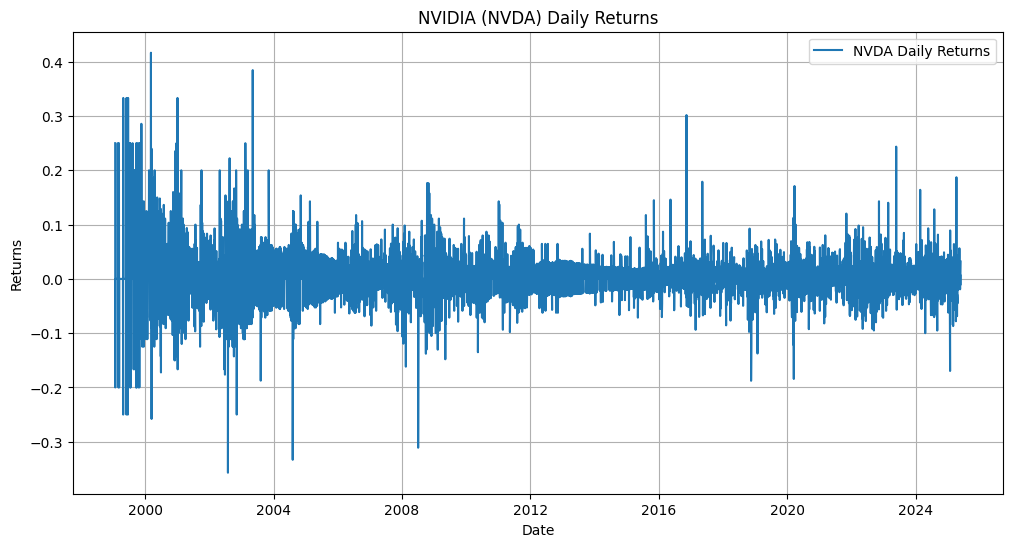

In [75]:
# Convert Date column to datetime
nvda_df['Date'] = pd.to_datetime(nvda_df['Date'])

# Sort by date before calculating returns
nvda_df = nvda_df.sort_values('Date')

# Calculate daily returns
nvda_df['Returns'] = nvda_df['Close'].pct_change()

# Create the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(nvda_df['Date']), nvda_df['Returns'], label='NVDA Daily Returns')
plt.title('NVIDIA (NVDA) Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)
plt.legend()
plt.show()

In [76]:
nvda_df['Returns']

6682         NaN
6681    0.250000
6680   -0.200000
6679    0.000000
6678    0.000000
          ...   
4      -0.008778
3      -0.019199
2       0.007815
1      -0.011594
0       0.032066
Name: Returns, Length: 6683, dtype: float64

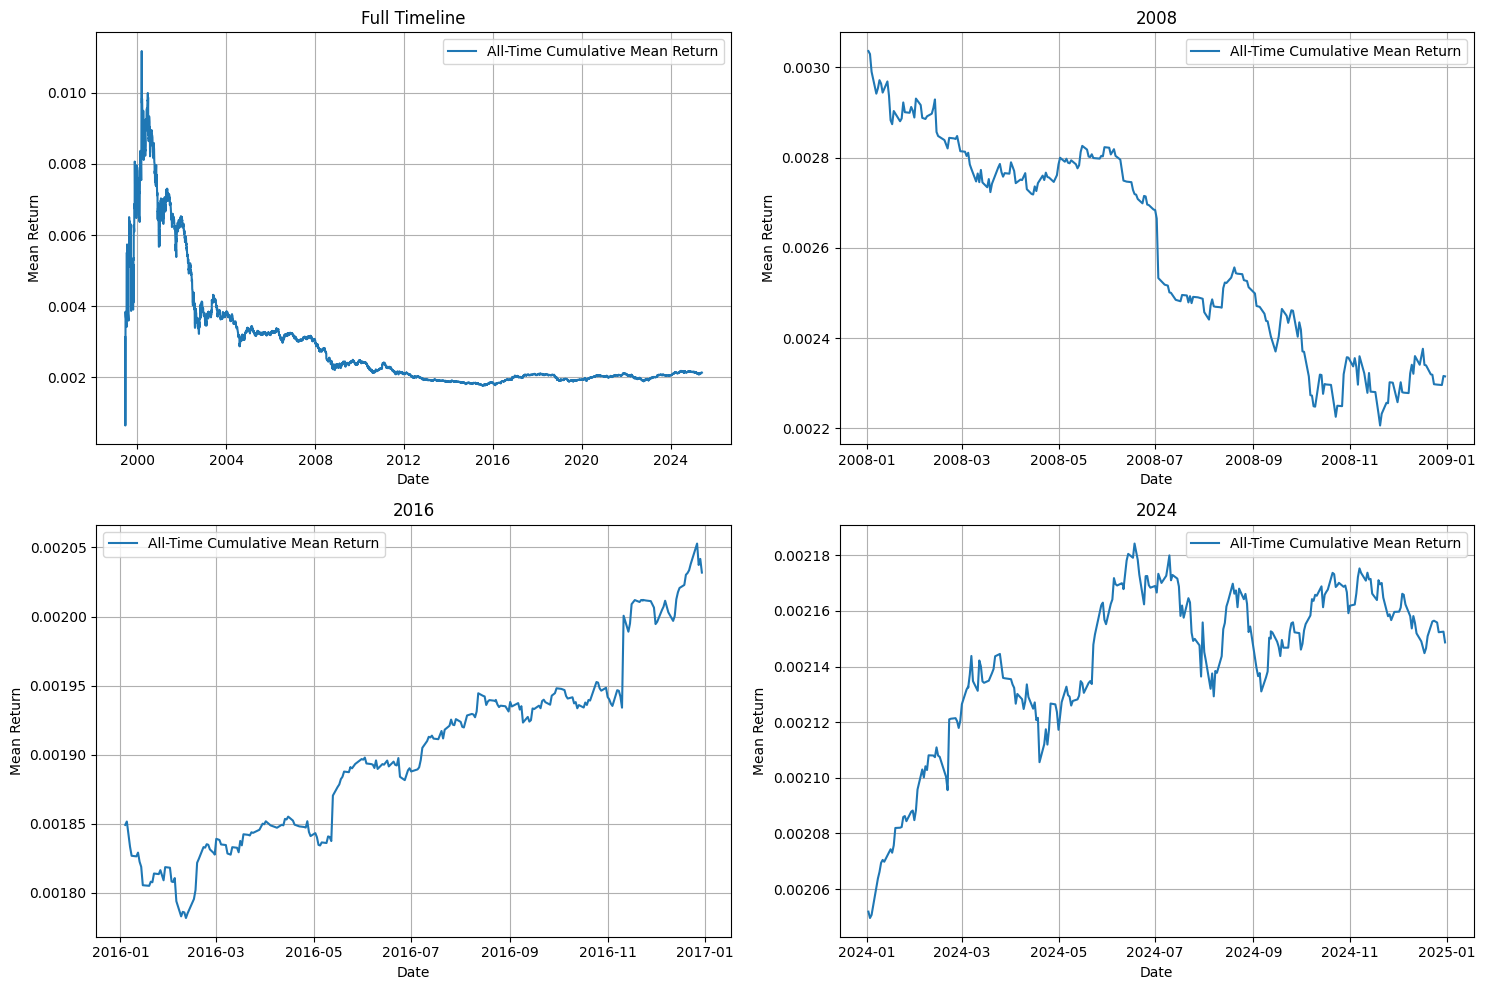

In [77]:
import numpy as np

# Calculate cumulative mean return over time, skipping first value which is NaN
nvda_df['Cumulative_Mean'] = nvda_df['Returns'].cumsum() / np.cumsum(np.ones(len(nvda_df)))

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Entire timeline
ax1.plot(nvda_df['Date'].iloc[100:], nvda_df['Cumulative_Mean'].iloc[100:], label='All-Time Cumulative Mean Return')
ax1.set_title('Full Timeline')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Return')
ax1.grid(True)
ax1.legend()

# Plot 2: 2008
mask_2008 = nvda_df['Date'].dt.year == 2008
ax2.plot(nvda_df[mask_2008]['Date'], nvda_df[mask_2008]['Cumulative_Mean'], label='All-Time Cumulative Mean Return')
ax2.set_title('2008')
ax2.set_xlabel('Date')
ax2.set_ylabel('Mean Return')
ax2.grid(True)
ax2.legend()

# Plot 3: 2016
mask_2016 = nvda_df['Date'].dt.year == 2016
ax3.plot(nvda_df[mask_2016]['Date'], nvda_df[mask_2016]['Cumulative_Mean'], label='All-Time Cumulative Mean Return')
ax3.set_title('2016')
ax3.set_xlabel('Date')
ax3.set_ylabel('Mean Return')
ax3.grid(True)
ax3.legend()

# Plot 4: 2024
mask_2024 = nvda_df['Date'].dt.year == 2024
ax4.plot(nvda_df[mask_2024]['Date'], nvda_df[mask_2024]['Cumulative_Mean'], label='All-Time Cumulative Mean Return')
ax4.set_title('2024')
ax4.set_xlabel('Date')
ax4.set_ylabel('Mean Return')
ax4.grid(True)
ax4.legend()

plt.tight_layout()
plt.show()


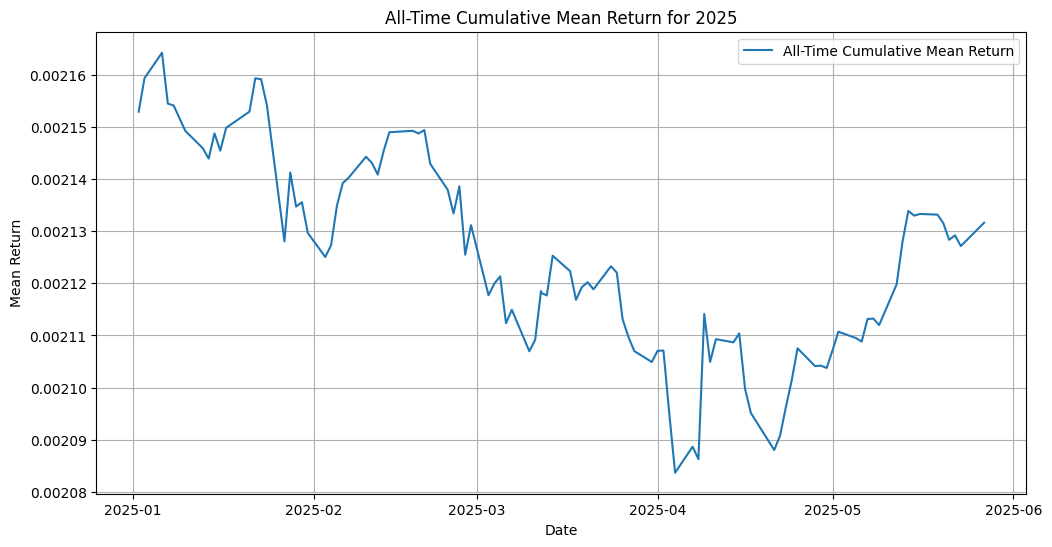

In [78]:
# Plot for 2025
mask_2025 = nvda_df['Date'].dt.year == 2025
plt.figure(figsize=(12, 6))
plt.plot(nvda_df[mask_2025]['Date'], nvda_df[mask_2025]['Cumulative_Mean'], label='All-Time Cumulative Mean Return')
plt.title('All-Time Cumulative Mean Return for 2025')
plt.xlabel('Date')
plt.ylabel('Mean Return')
plt.grid(True)
plt.legend()
plt.show()

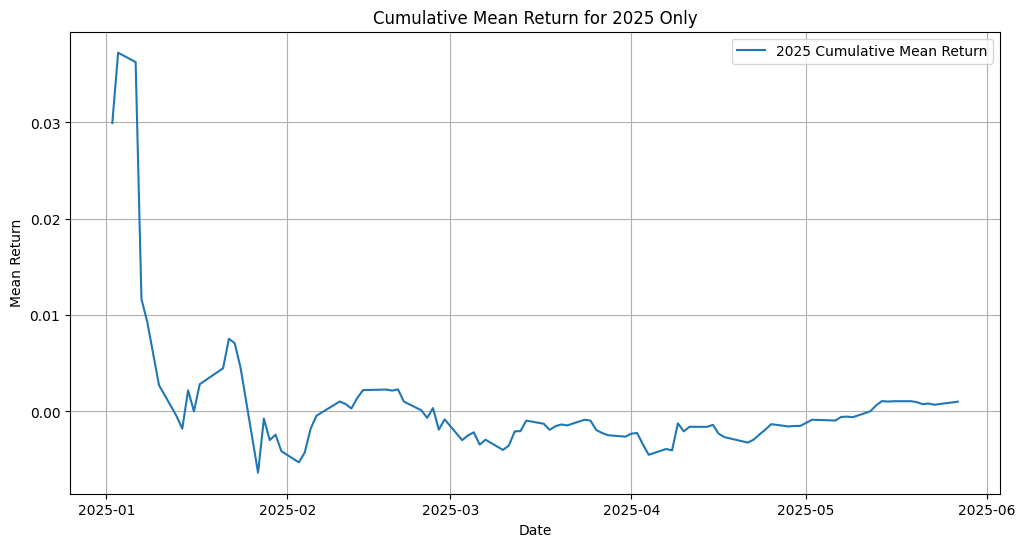

In [79]:
# Calculate cumulative mean return for 2025 only
mask_2025 = nvda_df['Date'].dt.year == 2025
returns_2025 = nvda_df[mask_2025]['Returns']
cumulative_mean_2025 = returns_2025.expanding().mean()

plt.figure(figsize=(12, 6))
plt.plot(nvda_df[mask_2025]['Date'], cumulative_mean_2025, label='2025 Cumulative Mean Return')
plt.title('Cumulative Mean Return for 2025 Only')
plt.xlabel('Date')
plt.ylabel('Mean Return')
plt.grid(True)
plt.legend()
plt.show()

# Modeling the Mean as a Stochastic Process

The analysis above suggests that the mean return is not constant over time. We can model this time-varying mean using several approaches:

## 1. Kalman Filter
- Can model the mean as an unobserved state that evolves according to a state equation
- Returns would be noisy observations of this underlying mean process
- Kalman filter provides optimal estimates of the mean at each point in time
- Can capture gradual shifts in the mean return

## 2. Regime-Switching Models 
- Model the mean as switching between different regimes/states
- Each regime has its own mean level
- Transitions between regimes follow a Markov process
- Can capture abrupt changes in market conditions

## 3. GARCH-in-Mean Models
- Allow the mean to depend on volatility
- Captures relationship between risk and expected return
- Mean varies as market volatility changes

## 4. Bayesian Time Series Models
- Place a prior distribution on the mean process
- Update beliefs about the mean as new data arrives
- Can incorporate structural breaks and parameter uncertainty

Next steps would be to:
1. Implement a Kalman filter to estimate the time-varying mean
2. Compare different models using information criteria
3. Evaluate out-of-sample forecasting performance
4. Test for structural breaks in the mean process


# Kalman Filter Implementation

The Kalman filter provides an elegant way to estimate the unobserved mean return process. Let's denote:

- $\mu_t$: The unobserved mean return at time $t$
- $r_t$: The observed return at time $t$

Our state-space model is:

State equation: $\mu_t = \mu_{t-1} + w_t$, where $w_t \sim N(0,Q)$
Observation equation: $r_t = \mu_t + v_t$, where $v_t \sim N(0,R)$ 

Here:
- $Q$ is the state transition variance (set to 0.01)
- $R$ is the observation variance (set to 1)

We first train the filter on 2024 data to obtain:
- Initial state estimate $\hat{\mu}_{2024|2024}$
- Initial state uncertainty $P_{2024|2024}$

Then for each 2025 observation $r_t$, we:
1. Predict: $\hat{\mu}_{t|t-1} = \hat{\mu}_{t-1|t-1}$
2. Update: $\hat{\mu}_{t|t} = \hat{\mu}_{t|t-1} + K_t(r_t - \hat{\mu}_{t|t-1})$

Where $K_t$ is the Kalman gain that optimally weights new information.

This sequential filtering provides real-time estimates of the evolving mean process.


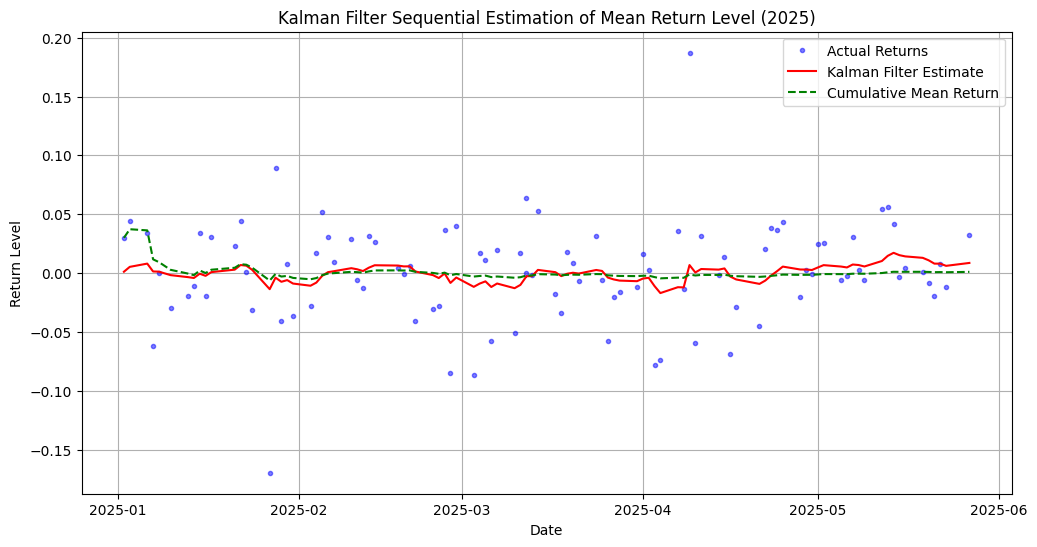


Kalman Filter Summary for 2025:
Mean estimated level: 0.000009
Std dev of estimates: 0.007012


In [82]:
# Import required libraries
from pykalman import KalmanFilter
import numpy as np
from datetime import datetime

# Prepare data for Kalman Filter
# Use 2024 data for initial training
mask_2024 = nvda_df['Date'].dt.year == 2024
mask_2025 = nvda_df['Date'].dt.year == 2025
returns_2024 = nvda_df[mask_2024]['Returns'].dropna().values

# Initialize Kalman Filter
kf = KalmanFilter(
    initial_state_mean=0,
    initial_state_covariance=1,
    transition_matrices=[1],
    observation_matrices=[1],
    observation_covariance=1,
    transition_covariance=0.01
)

# Get initial state estimate from 2024 data
state_means_2024, state_covs_2024 = kf.filter(returns_2024)
initial_state_mean = state_means_2024[-1][0]
initial_state_cov = state_covs_2024[-1][0][0]

# Process 2025 data sequentially
returns_2025 = nvda_df[mask_2025]['Returns'].dropna().values
dates_2025 = nvda_df[mask_2025]['Date']

# Initialize arrays for storing filtered states
filtered_means = np.zeros(len(returns_2025))
current_state = initial_state_mean
current_cov = initial_state_cov

# Apply Kalman filter sequentially through 2025
for t in range(len(returns_2025)):
    # Update step
    current_state, current_cov = kf.filter_update(
        filtered_state_mean=current_state,
        filtered_state_covariance=current_cov,
        observation=returns_2025[t]
    )
    filtered_means[t] = current_state

# Plot results
plt.figure(figsize=(12, 6))

# Plot actual returns
plt.plot(dates_2025, returns_2025, 'b.', alpha=0.5, label='Actual Returns')

# Plot Kalman filter estimates
plt.plot(dates_2025, filtered_means, 'r-', label='Kalman Filter Estimate')

# Calculate and plot cumulative mean return
cumulative_mean = np.cumsum(returns_2025) / np.arange(1, len(returns_2025) + 1)
plt.plot(dates_2025, cumulative_mean, 'g--', label='Cumulative Mean Return')

plt.title('Kalman Filter Sequential Estimation of Mean Return Level (2025)')
plt.xlabel('Date')
plt.ylabel('Return Level')
plt.grid(True)
plt.legend()
plt.show()

# Print summary statistics
print("\nKalman Filter Summary for 2025:")
print(f"Mean estimated level: {np.mean(filtered_means):.6f}")
print(f"Std dev of estimates: {np.std(filtered_means):.6f}")


# The Elusive Nature of Expected Returns

# Key insights about expected returns:

 * The concept of a "true" mean return is philosophically and mathematically complex
   * Similar to the St. Petersburg paradox where expected value diverges
   * Presents fundamental challenge to classical statistical thinking

 * Frequentist assumptions break down for financial returns:
   * Parameters are not fixed quantities that can be discovered through sampling
   * No stable ensemble exists to converge to
   * New information can fundamentally alter return-generating process
   * Markets are not ergodic - time averages don't converge to ensemble averages

 * Limitations of estimation techniques:
   * Even sophisticated methods like Kalman filtering have philosophical caveats
   * Estimates are useful tools but don't represent permanent truths
   * Non-stationarity means we must be humble about what we're measuring
   * Any methodology comes with deep uncertainties about the nature of returns
